# 3.2 Метод Зейделя

In [1]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

from comp_pkg import ZeidelSolver

In [3]:
lambdas = np.abs(sps.norm.rvs(scale=5, size=100))
lambdas = lambdas / np.sum(lambdas) * 100

A = sps.random_correlation.rvs(lambdas)

b = sps.norm.rvs(np.ones(100) * 7)

SOLUTION = np.linalg.solve(A, b)

ITERATIONS: int = 1000


In [4]:
solver = ZeidelSolver(A, b)
solution, trace = solver.solve(ITERATIONS, tol=1e-5)

tolerance = [np.linalg.norm(point - SOLUTION) for point in trace]

  0%|          | 0/1000 [00:00<?, ?it/s]

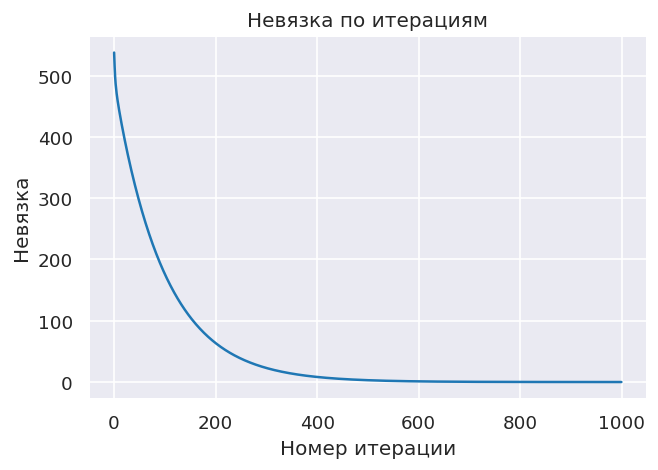

In [5]:
with sns.plotting_context('notebook'), sns.axes_style('darkgrid'):
    plt.figure(figsize=(6, 4), dpi=120)
    plt.plot(np.arange(len(tolerance)), tolerance)
    plt.title(r"Невязка по итерациям")
    plt.xlabel("Номер итерации")
    plt.ylabel("Невязка")
    plt.show()

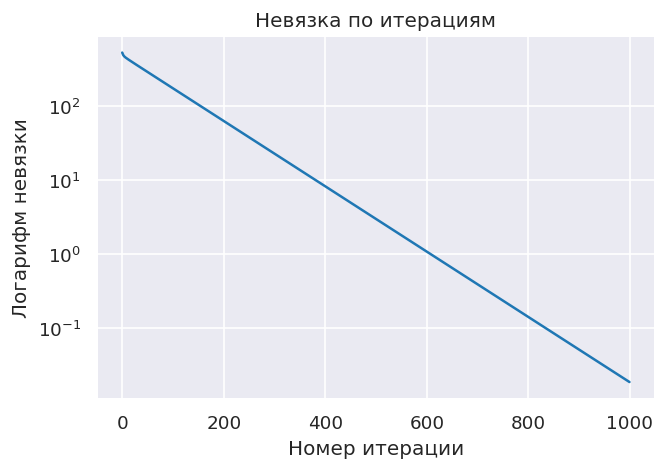

In [6]:
with sns.plotting_context('notebook'), sns.axes_style('darkgrid'):
    plt.figure(figsize=(6, 4), dpi=120)
    plt.semilogy(np.arange(len(tolerance)), tolerance)
    plt.title(r"Невязка по итерациям")
    plt.xlabel("Номер итерации")
    plt.ylabel("Логарифм невязки")
    plt.show()

**Комментарий:** Время работы написанного решения - 50 секунд. Время работы numpy версии - 0.1 секунды.